In [7]:
import numpy as np;import pandas as pd;
wine=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\wine.data',header=None)
wine.columns = ['Class_label', 'Alcohol',
'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines',
'Proline']


In [8]:
from sklearn.model_selection import train_test_split;from sklearn.preprocessing import StandardScaler
X=wine.iloc[:,1:].values
y=wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,stratify=y,test_size=0.3)
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)


In [9]:
np.set_printoptions(precision=4)
vector_mean=[]

for i in range(1,4):
    vector_mean.append(np.mean(X_train_std[y_train==i],axis=0))

vector_mean

[array([ 0.9066, -0.3497,  0.3201, -0.7189,  0.5056,  0.8807,  0.9589,
        -0.5516,  0.5416,  0.2338,  0.5897,  0.6563,  1.2075]),
 array([-0.8749, -0.2848, -0.3735,  0.3157, -0.3848, -0.0433,  0.0635,
        -0.0946,  0.0703, -0.8286,  0.3144,  0.3608, -0.7253]),
 array([ 0.1992,  0.866 ,  0.1682,  0.4148, -0.0451, -1.0286, -1.2876,
         0.8287, -0.7795,  0.9649, -1.209 , -1.3622, -0.4013])]

In [10]:
s_W=np.zeros((13,13))

for clase,vm in zip(range(1,4),vector_mean):
    s_i=np.zeros((13,13))
    for row in X_train_std[y_train==clase]:
        row,vm=row.reshape(13,1),vm.reshape(13,1)
        s_i+=(row-vm).dot((row-vm).T)
    s_W+=s_i



Text(0.5, 0, 'LDA 1')

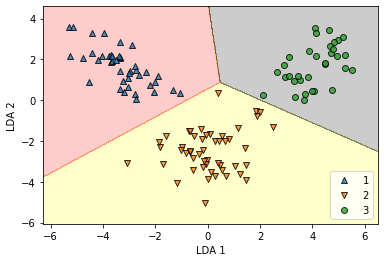

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA;import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
modelo=LDA(n_components=2)
X_train_lda=modelo.fit_transform(X_train_std,y_train)
lr=LogisticRegression(C=10)
lr.fit(X_train_lda,y_train)

from fronteras import visualizador
visualizador.visualizar_fronteras(X_train_lda,y_train,lr)
plt.ylabel('LDA 2');plt.xlabel('LDA 1')

1.0

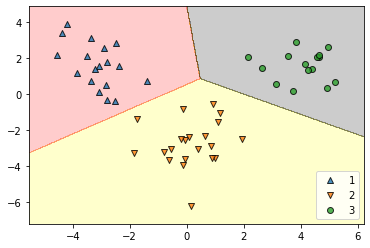

In [12]:
X_test_ldad=modelo.transform(X_test_std)
y_predict=lr.predict(X_test_ldad)
visualizador.visualizar_fronteras(X_test_ldad,y_predict,lr)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)